importing necessary libraries

Q: Use vehicle dataset, read and print the top few rows of the dataset. Do the pair plots. Perform standard scaling. Fit MLP classifier model for the traning datset and predict the target for test data. Show the confusion matrix, classification report and accuracy. Give the precision recall measures.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

reading the dataset and printing the first few rows

In [ ]:
df=pd.read_csv("vehicle.csv")
df.head()

95  48   83  178   72  10  162  42  20  159  176  379  184   70   6  16  \
0   91  41   84  141   57   9  149  45  19  143  170  330  158   72   9  14   
1  104  50  106  209   66  10  207  32  23  158  223  635  220   73  14   9   
2   93  41   82  159   63   9  144  46  19  143  160  309  127   63   6  10   
3   85  44   70  205  103  52  149  45  19  144  241  325  188  127   9  11   
4  107  57  106  172   50   6  255  26  28  169  280  957  264   85   5   9   

   187  197   van  
0  189  199   van  
1  188  196  saab  
2  199  207   van  
3  180  183   bus  
4  181  183   bus

In [ ]:
df.columns

Index(['95', '48', '83', '178', '72', '10', '162', '42', '20', '159', '176',
       '379', '184', '70', '6', '16', '187', '197', 'van'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   95      939 non-null    int64 
 1   48      939 non-null    int64 
 2   83      939 non-null    int64 
 3   178     939 non-null    int64 
 4   72      939 non-null    int64 
 5   10      939 non-null    int64 
 6   162     939 non-null    int64 
 7   42      939 non-null    int64 
 8   20      939 non-null    int64 
 9   159     939 non-null    int64 
 10  176     939 non-null    int64 
 11  379     939 non-null    int64 
 12  184     939 non-null    int64 
 13  70      939 non-null    int64 
 14  6       939 non-null    int64 
 15  16      939 non-null    int64 
 16  187     939 non-null    int64 
 17  197     939 non-null    int64 
 18  van     939 non-null    object
dtypes: int64(18), object(1)
memory usage: 139.5+ KB


In [ ]:
df.isna()

95     48     83    178     72     10    162     42     20    159  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
934  False  False  False  False  False  False  False  False  False  False   
935  False  False  False  False  False  False  False  False  False  False   
936  False  False  False  False  False  False  False  False  False  False   
937  False  False  False  False  False  False  False  False  False  False   
938  False  False  False  False  False  False  False  False  False  False   

       176    379    184     70      6     16    187    197    van  
0    False  False  False  False  False  False  False  False  False  
1    False  False  False  False  False  False  False  False  False  
2    False  False  False  False  False  False  False  False  False  
3    False  False  False  False  False  False  False  False  False  
4    False  False  False  False  False  False  False  False  False  
..     ...    ...    ...    ...    ...    ...    ...    ...    ...  
934  False  False  False  False  False  False  False  False  False  
935  False  False  False  False  False  False  False  False  False  
936  False  False  False  False  False  False  False  False  False  
937  False  False  False  False  False  False  False  False  False  
938  False  False  False  False  False  False  False  False  False  

[939 rows x 19 columns]

In [ ]:
df.isna().sum()

95     0
48     0
83     0
178    0
72     0
10     0
162    0
42     0
20     0
159    0
176    0
379    0
184    0
70     0
6      0
16     0
187    0
197    0
van    0
dtype: int64

Since the given dataset doesn't contain any null values. There no need to clean the data

In [ ]:
df.shape

(939, 19)

In [ ]:
x=df[['95','48',	'83',	'178',	'72',	'10',	'162',	'42',	'20',	'159',	'176',	'379',	'184',	'70',	'6','16',	'187',	'197'	]]
print(x)

      95  48   83  178   72  10  162  42  20  159  176  379  184   70   6  16  \
0     91  41   84  141   57   9  149  45  19  143  170  330  158   72   9  14   
1    104  50  106  209   66  10  207  32  23  158  223  635  220   73  14   9   
2     93  41   82  159   63   9  144  46  19  143  160  309  127   63   6  10   
3     85  44   70  205  103  52  149  45  19  144  241  325  188  127   9  11   
4    107  57  106  172   50   6  255  26  28  169  280  957  264   85   5   9   
..   ...  ..  ...  ...  ...  ..  ...  ..  ..  ...  ...  ...  ...  ...  ..  ..   
934   93  39   87  183   64   8  169  40  20  134  200  422  149   72   7  25   
935   89  46   84  163   66  11  159  43  20  159  173  368  176   72   1  20   
936  106  54  101  222   67  12  222  30  25  173  228  721  200   70   3   4   
937   86  36   78  146   58   7  135  50  18  124  155  270  148   66   0  25   
938   85  36   66  123   55   5  120  56  17  128  140  212  131   73   1  18   

     187  197  
0    189  1

In [ ]:
y=df[['van']]
print(y)

      van
0     van
1    saab
2     van
3     bus
4     bus
..    ...
934  saab
935   van
936  saab
937  saab
938   van

[939 rows x 1 columns]


Plotting pair plot for df using seaborn pairplot function

In [ ]:
df['van'].unique()

array(['van', 'saab', 'bus', 'opel'], dtype=object)

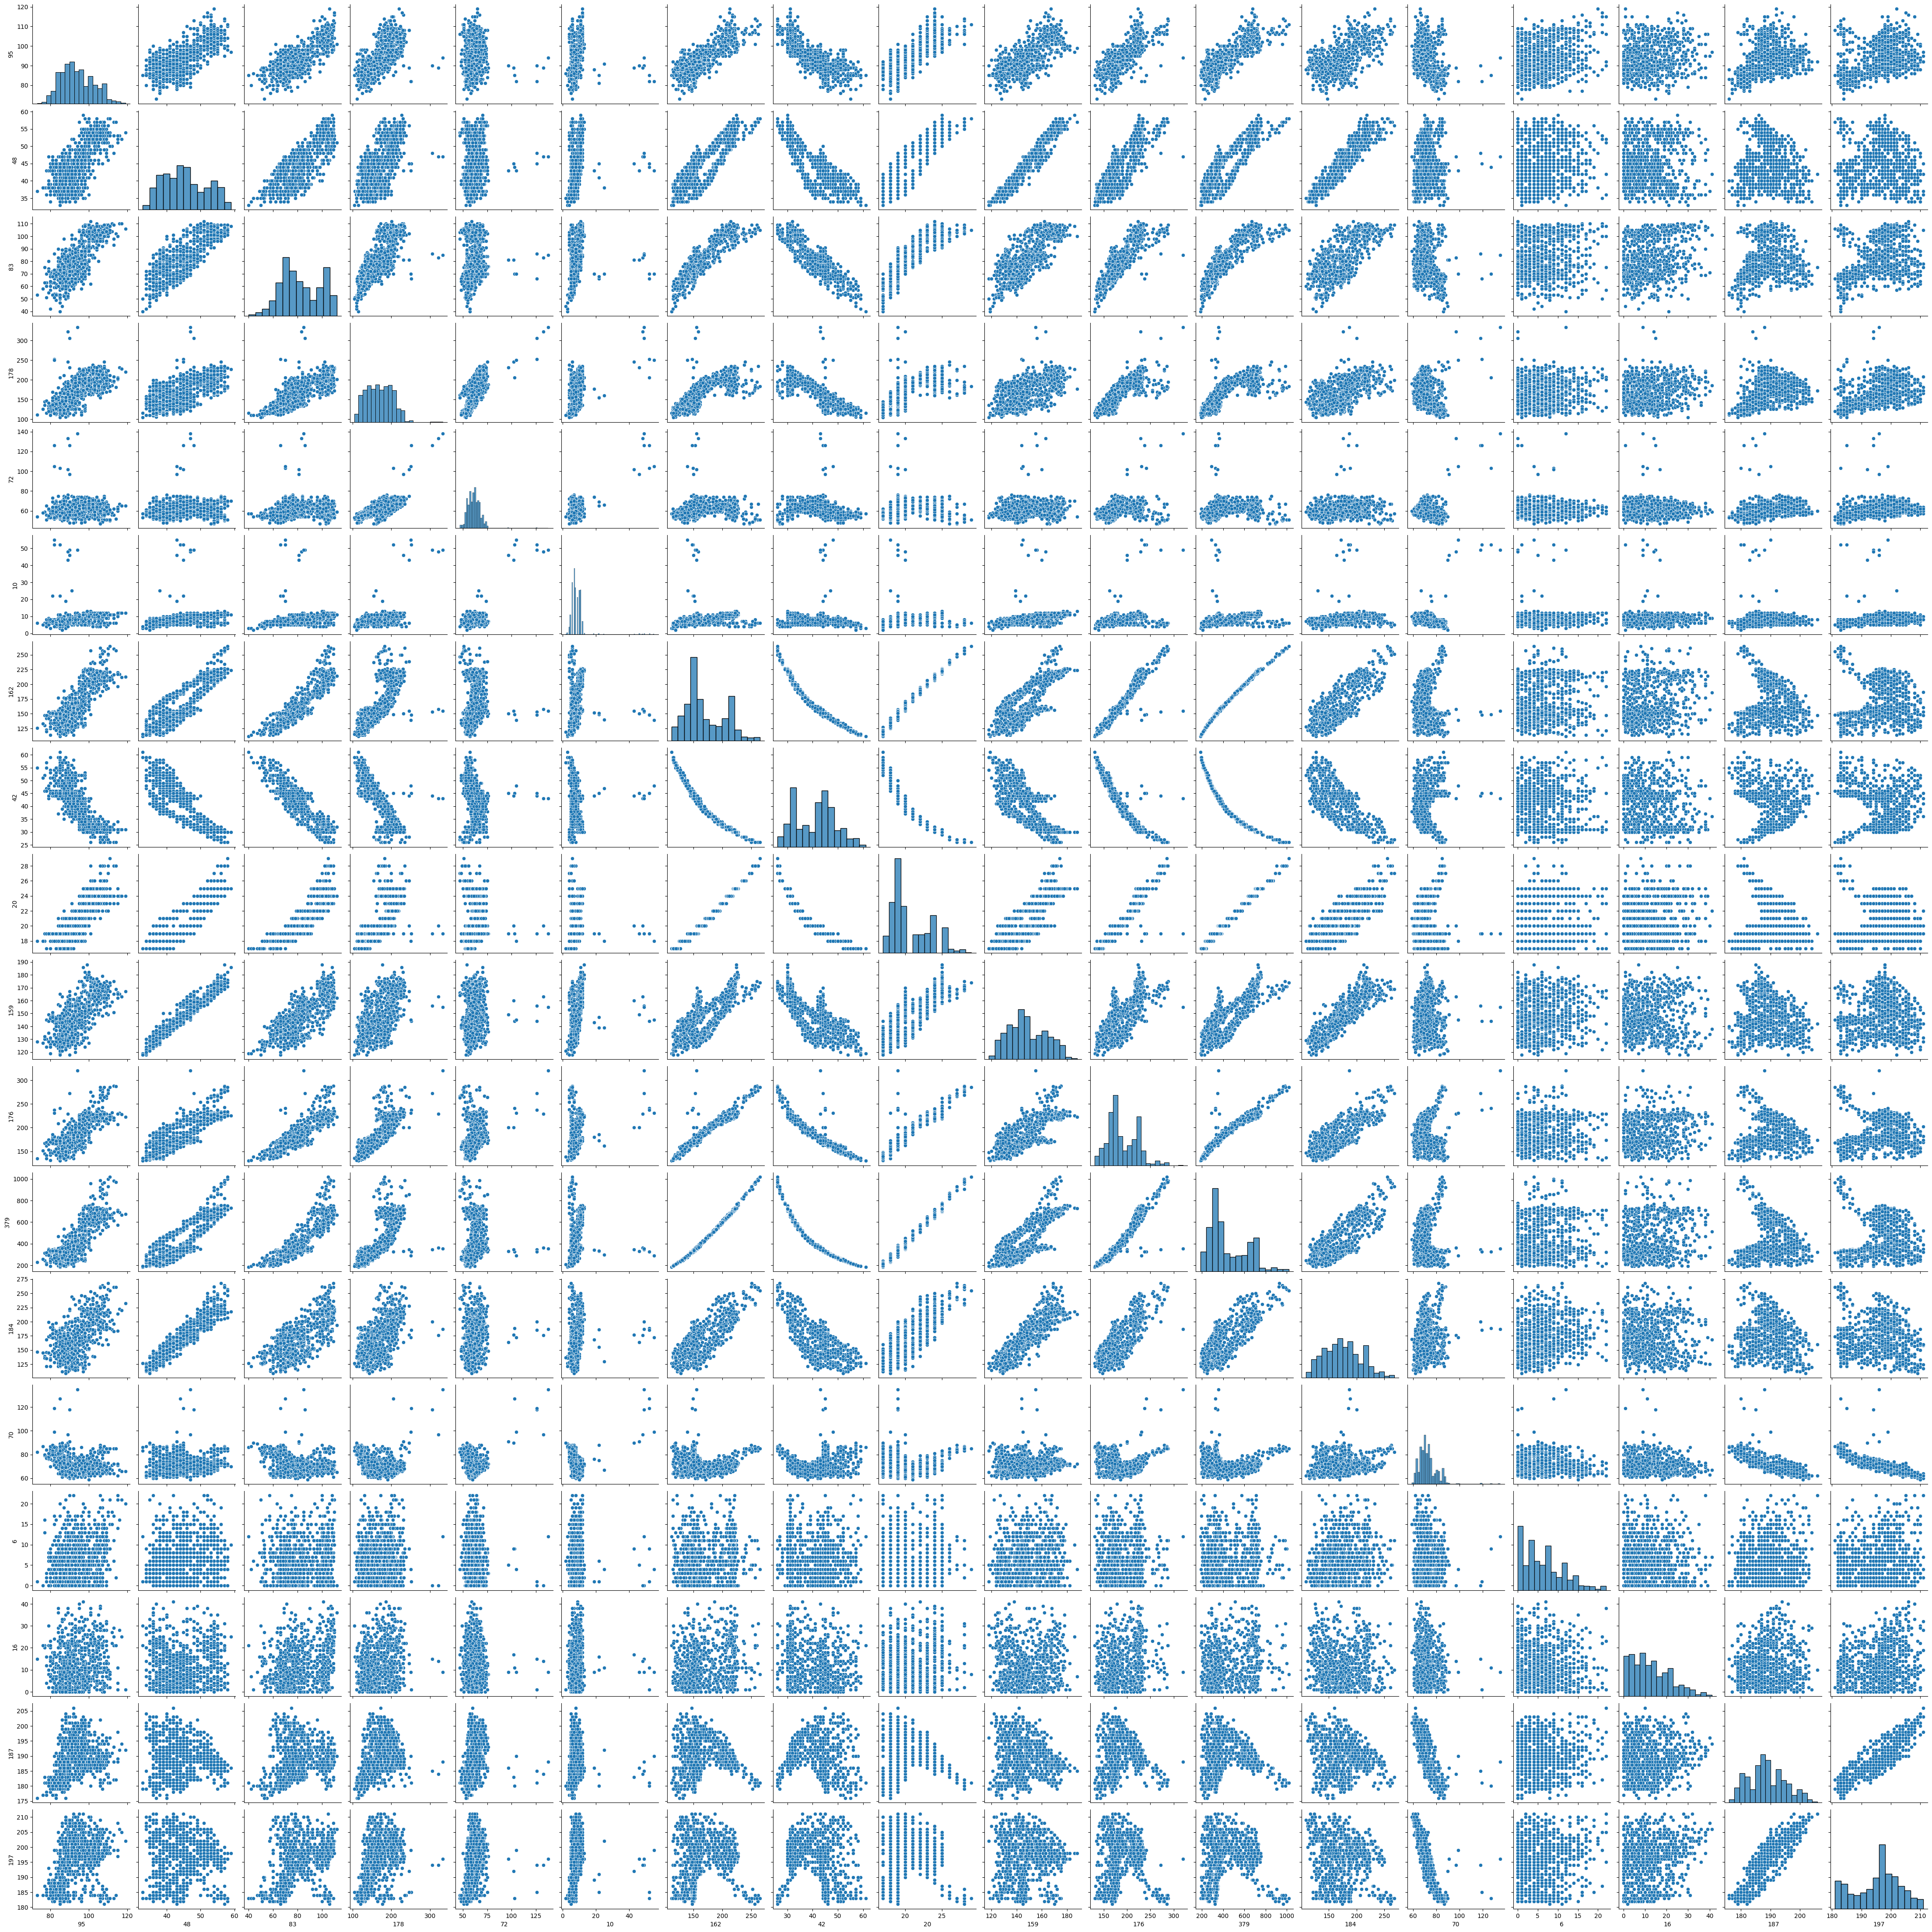

In [ ]:
import seaborn as sns
sns.pairplot(df)

In [ ]:
from sklearn.model_selection import train_test_split
y=y.replace(['van','saab','bus','opel'],[0,1,2,3])
y.head()

van
0    0
1    1
2    0
3    2
4    2

Splitting the data into train and test sets

In [ ]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
x_train.shape,x_test.shape

((657, 18), (282, 18))

In [ ]:
y_train.shape,y_test.shape

((657, 1), (282, 1))

performing standard scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std=StandardScaler()
x_train_scaled = std.fit_transform(x_train)

In [ ]:
x_train_scaled

array([[ 4.89128010e-01,  4.97993919e-01,  1.18923955e+00, ...,
        -6.52832947e-01, -1.01535801e-03,  3.57155410e-02],
       [-6.11410013e-01,  7.22091183e-03, -9.15249517e-02, ...,
         4.77070230e-01, -1.00165067e+00, -5.19671689e-01],
       [ 9.78256021e-01,  1.47953993e+00,  1.12520132e+00, ...,
         1.60697341e+00, -3.34560463e-01, -1.03131266e-01],
       ...,
       [-7.33692016e-01, -9.74325103e-01, -7.95945427e-01, ...,
         2.51089595e-02,  6.66074852e-01,  7.29949578e-01],
       [-1.22282003e-01, -4.83552096e-01, -1.18017478e+00, ...,
        -8.78813582e-02, -6.68105568e-01, -1.49159934e+00],
       [-2.44564005e-01, -1.13791611e+00, -1.43632768e+00, ...,
        -8.78813582e-01,  1.65757195e-01, -2.41978074e-01]])

In [ ]:
x_test_scaled = std.fit_transform(x_test)

In [ ]:
x_test_scaled

array([[ 1.48405908,  1.24364182,  0.98979568, ...,  0.89813983,
        -0.07524596,  0.22222454],
       [-0.04504732,  0.0027502 ,  0.24464138, ..., -0.95855803,
         0.86783676,  0.22222454],
       [-0.75078874, -0.46258415, -1.12147483, ..., -1.2862106 ,
         0.7106563 ,  0.72456779],
       ...,
       [-0.86841231,  0.15786166, -0.56260911, ..., -0.19403538,
        -1.33268959, -1.41039103],
       [-0.63316517, -1.39325287, -1.80453294, ...,  0.13361718,
        -1.33268959, -1.53597684],
       [ 0.54307052,  0.46808456,  1.17608425, ..., -0.84934051,
         0.08193449,  0.22222454]])

Fitting MLP clasifier model for the training dataset and predicting the target for test data

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(30,30),max_iter=3000)
mlp.fit(x_train_scaled,y_train)
pred=mlp.predict(x_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
pred

array([3, 2, 0, 3, 0, 3, 3, 0, 1, 2, 2, 1, 1, 0, 1, 0, 1, 2, 0, 0, 2, 2,
       3, 1, 2, 0, 0, 3, 3, 0, 1, 3, 1, 3, 2, 0, 1, 2, 2, 3, 3, 1, 3, 0,
       1, 2, 3, 0, 2, 2, 3, 1, 2, 2, 0, 2, 1, 2, 0, 2, 0, 1, 2, 0, 3, 2,
       0, 1, 1, 0, 2, 1, 3, 3, 2, 3, 3, 3, 1, 2, 0, 3, 3, 0, 2, 1, 1, 2,
       1, 1, 2, 1, 1, 3, 1, 1, 2, 0, 2, 1, 2, 3, 1, 2, 2, 0, 0, 1, 3, 3,
       1, 3, 1, 3, 3, 3, 0, 2, 1, 2, 0, 1, 3, 0, 0, 2, 1, 0, 2, 3, 3, 0,
       2, 0, 0, 1, 1, 3, 3, 1, 0, 0, 0, 2, 1, 2, 3, 2, 3, 1, 2, 2, 0, 2,
       1, 2, 3, 3, 3, 2, 2, 0, 2, 2, 1, 3, 3, 0, 2, 3, 1, 0, 3, 3, 1, 2,
       3, 1, 1, 1, 3, 0, 3, 0, 2, 1, 1, 3, 3, 1, 3, 2, 0, 0, 3, 1, 2, 0,
       3, 3, 3, 1, 3, 1, 2, 3, 3, 3, 1, 1, 3, 2, 1, 1, 3, 0, 2, 3, 2, 0,
       3, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 3, 2, 3, 3, 0, 2, 3, 0, 0, 0,
       3, 2, 1, 3, 1, 0, 3, 2, 3, 0, 2, 3, 2, 2, 1, 0, 3, 1, 3, 2, 2, 1,
       1, 2, 2, 0, 3, 0, 2, 0, 3, 1, 2, 2, 2, 2, 0, 2, 0, 3])

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy Scores ",accuracy_score(y_test,pred))
print("Classification Report: \n",classification_report(y_test,pred))
print("Confusion_matrix\n",confusion_matrix(y_test,pred))

Accuracy Scores  0.8368794326241135
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.93      0.95        61
           1       0.75      0.71      0.73        75
           2       0.95      0.99      0.97        72
           3       0.71      0.74      0.73        74

    accuracy                           0.84       282
   macro avg       0.84      0.84      0.84       282
weighted avg       0.84      0.84      0.84       282

Confusion_matrix
 [[57  2  1  1]
 [ 0 53  2 20]
 [ 0  0 71  1]
 [ 2 16  1 55]]


In [ ]:
import plotly.express as px
conf_mat = confusion_matrix(y_test, pred)
conf_mat_df = pd.DataFrame(conf_mat, columns=['Predicted van', 'Predicted saab','Predicted bus', 'Predicted opel'], index=['Actual van', 'Actual saab','Actual bus', 'Actual opel'])
plt1 = px.imshow(conf_mat_df,text_auto=True,color_continuous_scale='Blues')
plt1.update_xaxes(side='top',title_text='Predicted')
plt1.update_yaxes(title_text='Actual')
plt1.show()

precision=TP/(TP+FP)<br>
recall=TP/(TP+FN)

In [ ]:
a=['van','saab','bus','opel']

for i in range(4):
  TP=conf_mat[i][i]
  FP=0
  FN=0
  for j in range(4):
    if(i!=j):
      FN+=conf_mat[i][j]
  for j in range(4):
    if(i!=j):
      FP=conf_mat[j][i]
  print(a[i])
  precision=TP/(TP+FP)
  recall=TP/(TP+FN)
  print('precision:',precision)
  print('Recall:',recall)    

van
precision: 0.9661016949152542
Recall: 0.9344262295081968
saab
precision: 0.7681159420289855
Recall: 0.7066666666666667
bus
precision: 0.9861111111111112
Recall: 0.9861111111111112
opel
precision: 0.9821428571428571
Recall: 0.7432432432432432
